In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/priyanshpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('/Users/priyanshpatel/Desktop/codsoft/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
names = {"v1":"Spam/Ham","v2":"SMS"}
df.rename(columns = names,inplace = True)
df.head()

,Spam/Ham,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


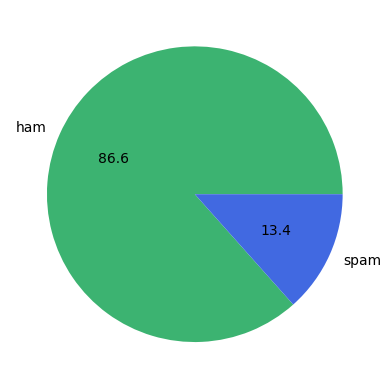

In [17]:
colors=['mediumseagreen','royalblue']
plt.pie(df['Spam/Ham'].value_counts(),labels=['ham','spam'],autopct='%0.1f',colors=colors)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Spam/Ham'] = le.fit_transform(df['Spam/Ham'])

In [19]:
df.head()

,Spam/Ham,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
X=df['SMS']
y=df['Spam/Ham']

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [25]:
X=tfid.fit_transform(X)

In [27]:
X

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
regressor=LogisticRegression()

In [34]:
regressor.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred=regressor.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred)

0.967713004484305

In [38]:
confusion_matrix(y_test, y_pred)

array([[975,   1],
       [ 35, 104]])

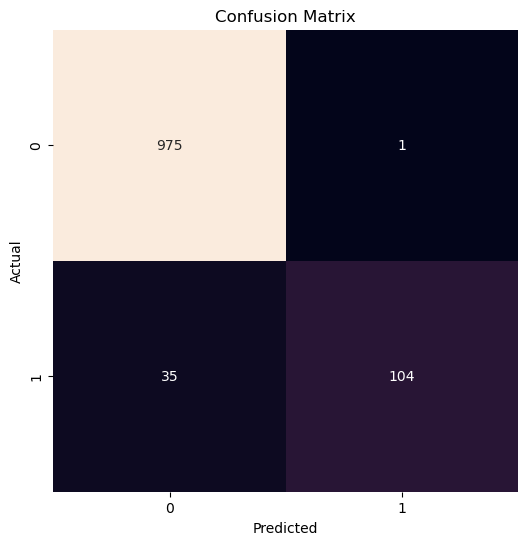

In [39]:
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix,annot=True,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()